In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns ; sns.set() ; 
from heapq import heappop, heappush 
from itertools import product

In [3]:
class State: 
    
    def __init__(self, points) :
        self.points = points.copy()
        
    @classmethod 
    def random_points(cls, n) : 
        points = np.random.randint(
                      0, n, size=n )
        return cls(points)
    
    def next_states(self) : 
        p = self.points
        for i, v in enumerate(p) : 
            x = v - 1 
            while x >= 0 : 
                p[i] = x
                yield State(p)
                x -= 1 
                
            x = p[i] = v  
            x += 1 
            while x <= len(p) - 1 :  
                p[i] = x 
                yield State(p)
                x += 1 
            
            p[i] = v 
            
    def print_state(self) : 
        p = self.points
        for i,j in product(range(len(p)), 
                           repeat=2): 
            if j == p[i] : 
                print(" * ", end="")
            else : 
                print(" - ", end="")
                
            if j == len(p) : 
                print("\n")
    
    def __lt__(self, other) : 
        return np.all(self.points < other.points)
    
    def __hash__(self) : 
        return hash(str(self.points))
    
    def __eq__(self, other) : 
        return True 
    

In [4]:
def heuristic(s) : 
    s = s.points 
    x = 0
    for i, v in enumerate(s) : 
        for j, v_ in enumerate(s[i+1:]) :
            if (v_ - v) / (j + 1) in [1,-1] : 
                x += 1 
    return x + (len(s) - len(np.unique(s)))

def search(s) : 
    heap = [(heuristic(s), s)]
    visited = {s}
    while heap : 
        h, v = heappop(heap) 
        if h == 0 : 
            return v.points
        for next_ in v.next_states() : 
            if next_ not in visited : 
                h = heuristic(next_) 
                heappush(heap, (h, next_))
                
        visited |= {v}    

In [10]:
timings = [] 
for i in range(8, 16 + 1) :
    t = %timeit -o search(State.random_points(i))
    timings += [t.timings]

143 ms ± 26.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
203 ms ± 48.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 6.53 times longer than the fastest. This could mean that an intermediate result is being cached.
461 ms ± 259 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.05 times longer than the fastest. This could mean that an intermediate result is being cached.
692 ms ± 292 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 5.33 times longer than the fastest. This could mean that an intermediate result is being cached.
893 ms ± 474 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 23.98 times longer than the fastest. This could mean that an intermediate result is being cached.
1.78 s ± 1.91 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 8.33 times longer than the fastest. This could mean that an intermediate result is being cached.
1

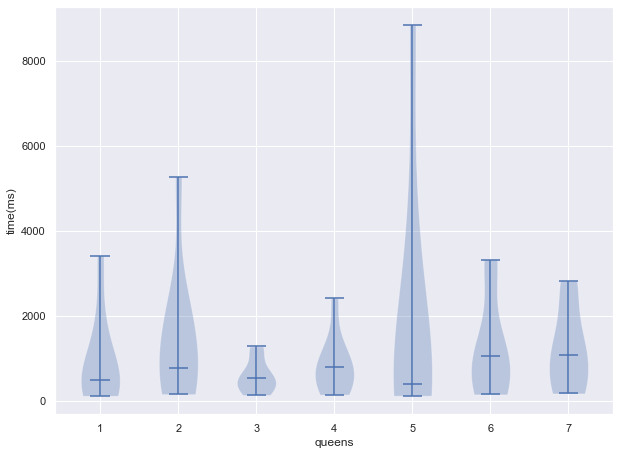

In [33]:
fig = plt.gcf()
fig.set_size_inches(10.0, 7.5)
plt.violinplot(np.array(timings) * 1e3, showmedians=True);
plt.ylabel("time(ms)");
plt.xlabel("queens");
plt.savefig("greedy_results.png")